## Crop Recommendation and Fertilizer Prediction using Machine Learning

In [206]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [207]:
# Reading the dataset which is in .csv format 
crop=pd.read_csv("dataset/Crop_recommendation.csv")

In [208]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [209]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [210]:
#shape returns the number of rows and columns in a dataset
crop.shape

(2200, 8)

In [211]:
#It returns the description abouve the given dataset
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
N              2200 non-null int64
P              2200 non-null int64
K              2200 non-null int64
temperature    2200 non-null float64
humidity       2200 non-null float64
ph             2200 non-null float64
rainfall       2200 non-null float64
label          2200 non-null object
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [212]:
#It checks whether teh given dataset conatins null values or not and return Boolean values
crop.isnull()

,N,P,K,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False


In [213]:
#It returns the sum of missing values
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [214]:
#Checks fro duplicated values
crop.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Length: 2200, dtype: bool

In [215]:
#Returns the sum of duplicated values
crop.duplicated().sum()

0

In [216]:
#To check the statistics of the given dataset: Total Values in col, Mean, Standard Deviation, Minimum, 25%, 50%,75%, Max
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [217]:
#Returns the column names as a list
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [218]:
#Checks the feature of specific column(checks target feature distribution )
crop['label'].value_counts()

jute           100
muskmelon      100
lentil         100
mothbeans      100
coconut        100
chickpea       100
pomegranate    100
apple          100
cotton         100
grapes         100
kidneybeans    100
orange         100
blackgram      100
maize          100
rice           100
mango          100
mungbean       100
pigeonpeas     100
papaya         100
banana         100
coffee         100
watermelon     100
Name: label, dtype: int64

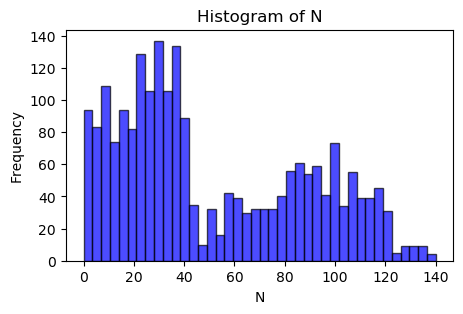

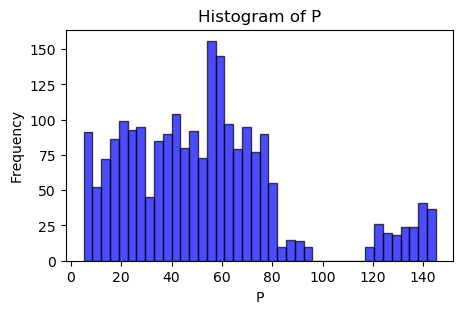

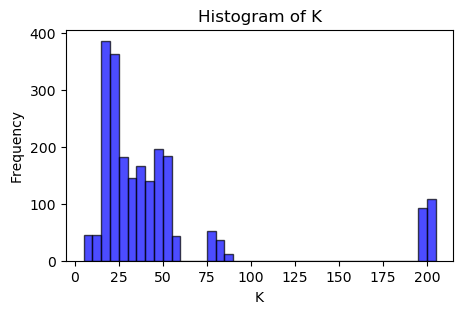

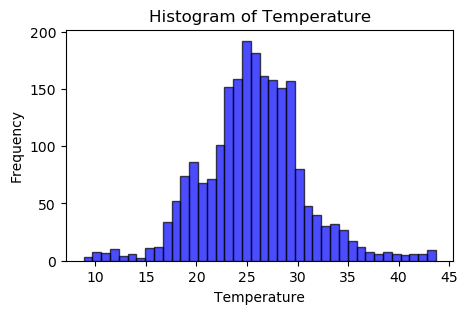

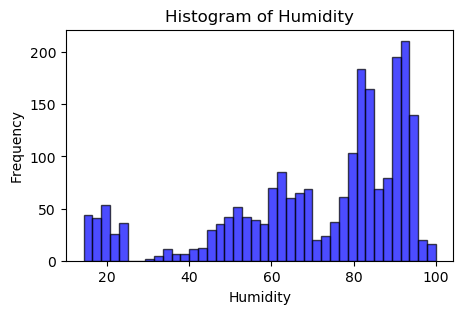

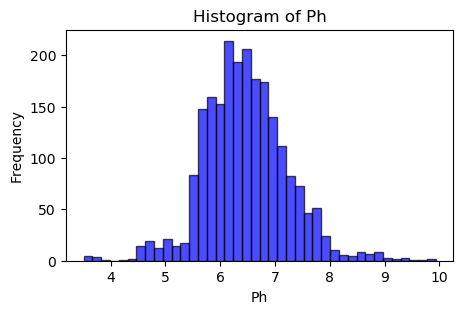

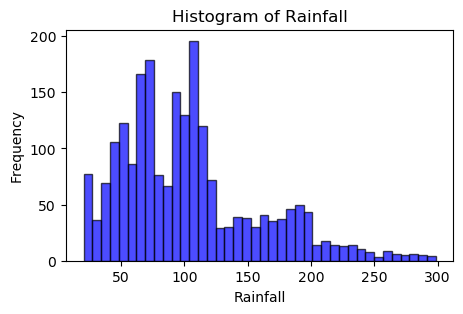

In [219]:
##We can iterate through columns(list containing the labels of dataframe 'crop') to plot histograms for each label and 
##we have given xlabel,ylabel and others features to enhance the graph representation.
cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for col in cols:
    plt.figure(figsize=(5,3))
    plt.hist(crop[col], bins=40, color='blue', edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    plt.show()


In [220]:
#calculates the correlation matrix for the crop dataset: computes the pairwise correlation of all numerical columns in the crop DataFrame.
#If corr is 1: it is perferctly positive correlated, corr==-1: negatively correlated, corr=0:represents no relation i.e., 
#corr_matrix shows the realtion between the different columns of dataset and how to effect each other.
corr_mat=crop.corr()
corr_mat

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


In [221]:
features=crop.columns.to_list()
features.remove('label')
print(features)

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


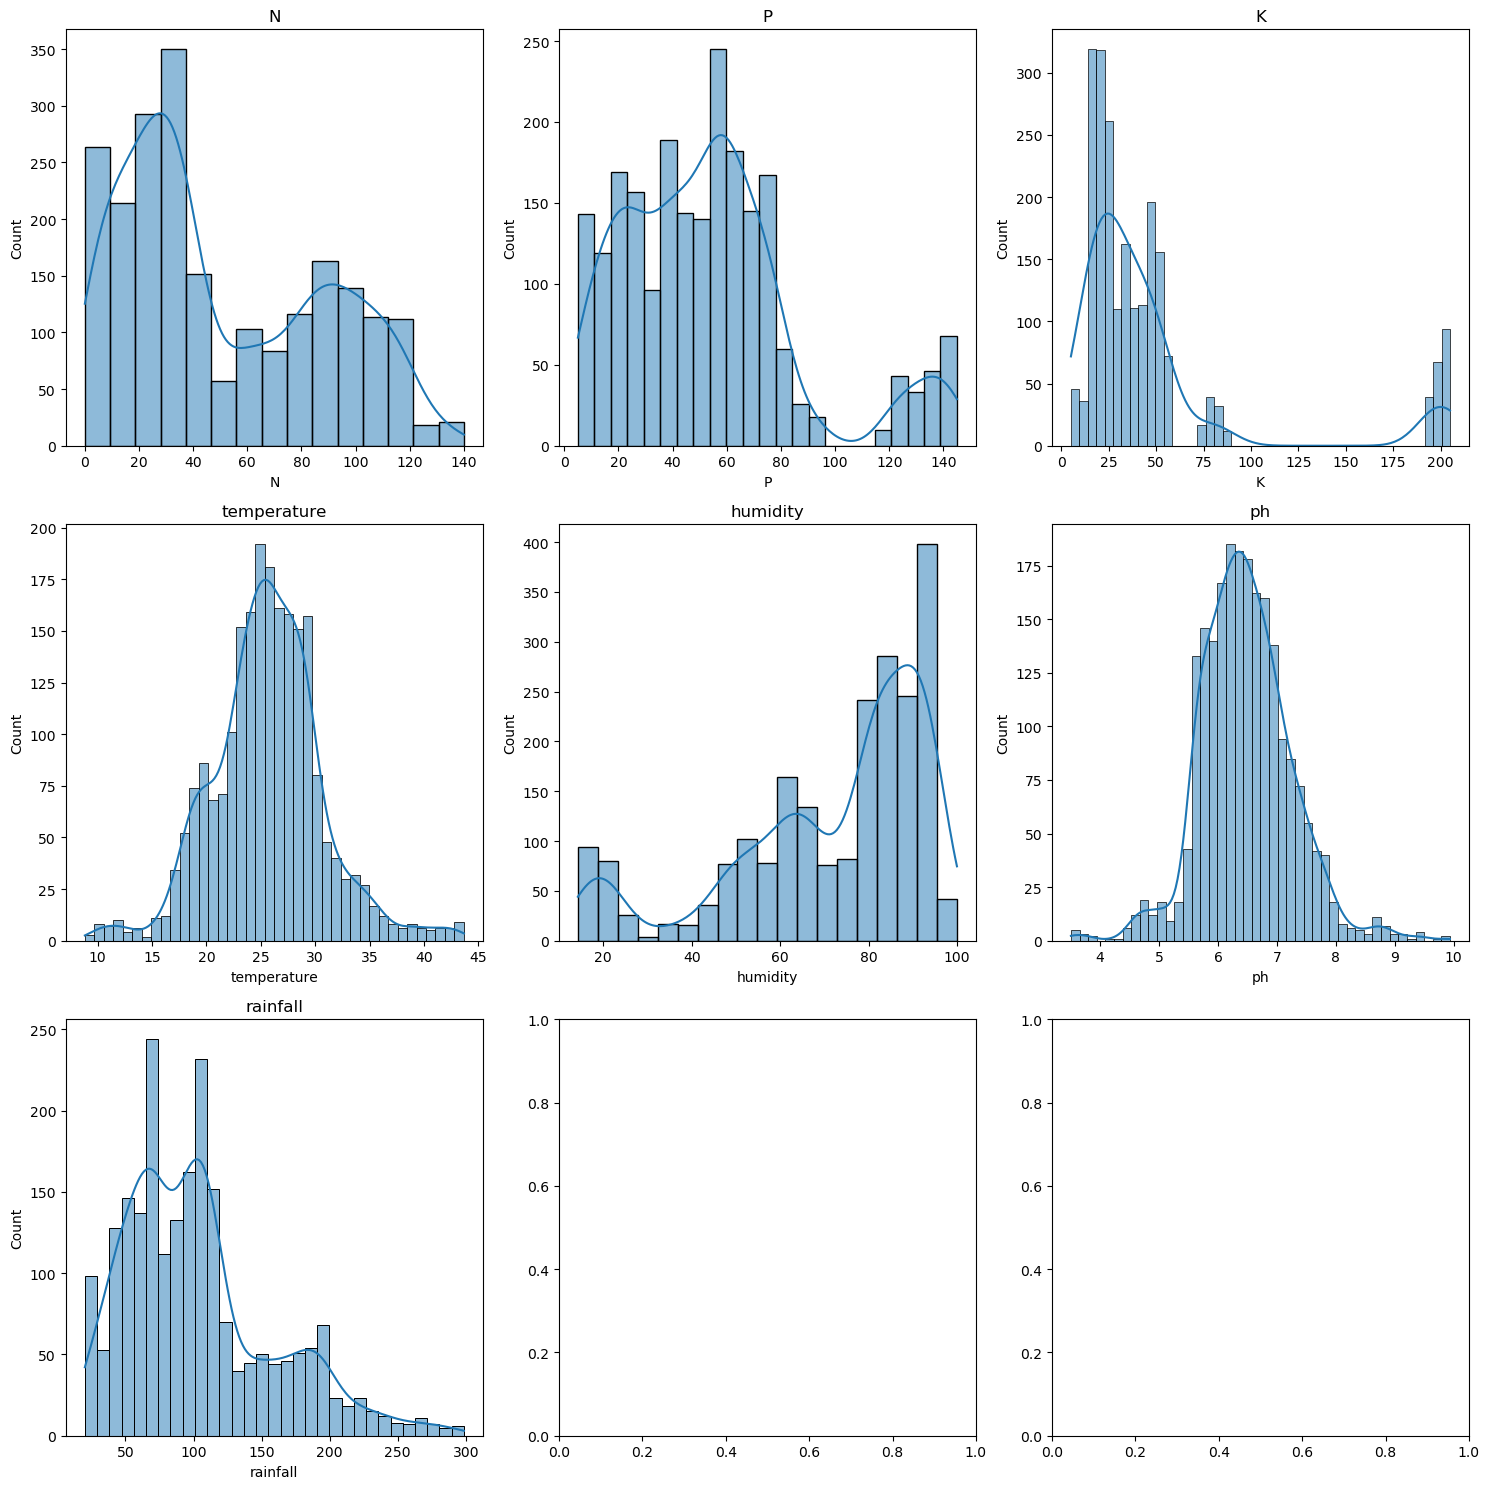

In [222]:
#Visualising the distribution of each feature

fig, ax = plt.subplots(3,3, figsize=(15,15))
for i, subplot in zip(features, ax.flatten()):
    sns.histplot(crop[i], ax=subplot, kde=True)
    subplot.set_title(i)

plt.tight_layout()
plt.show()

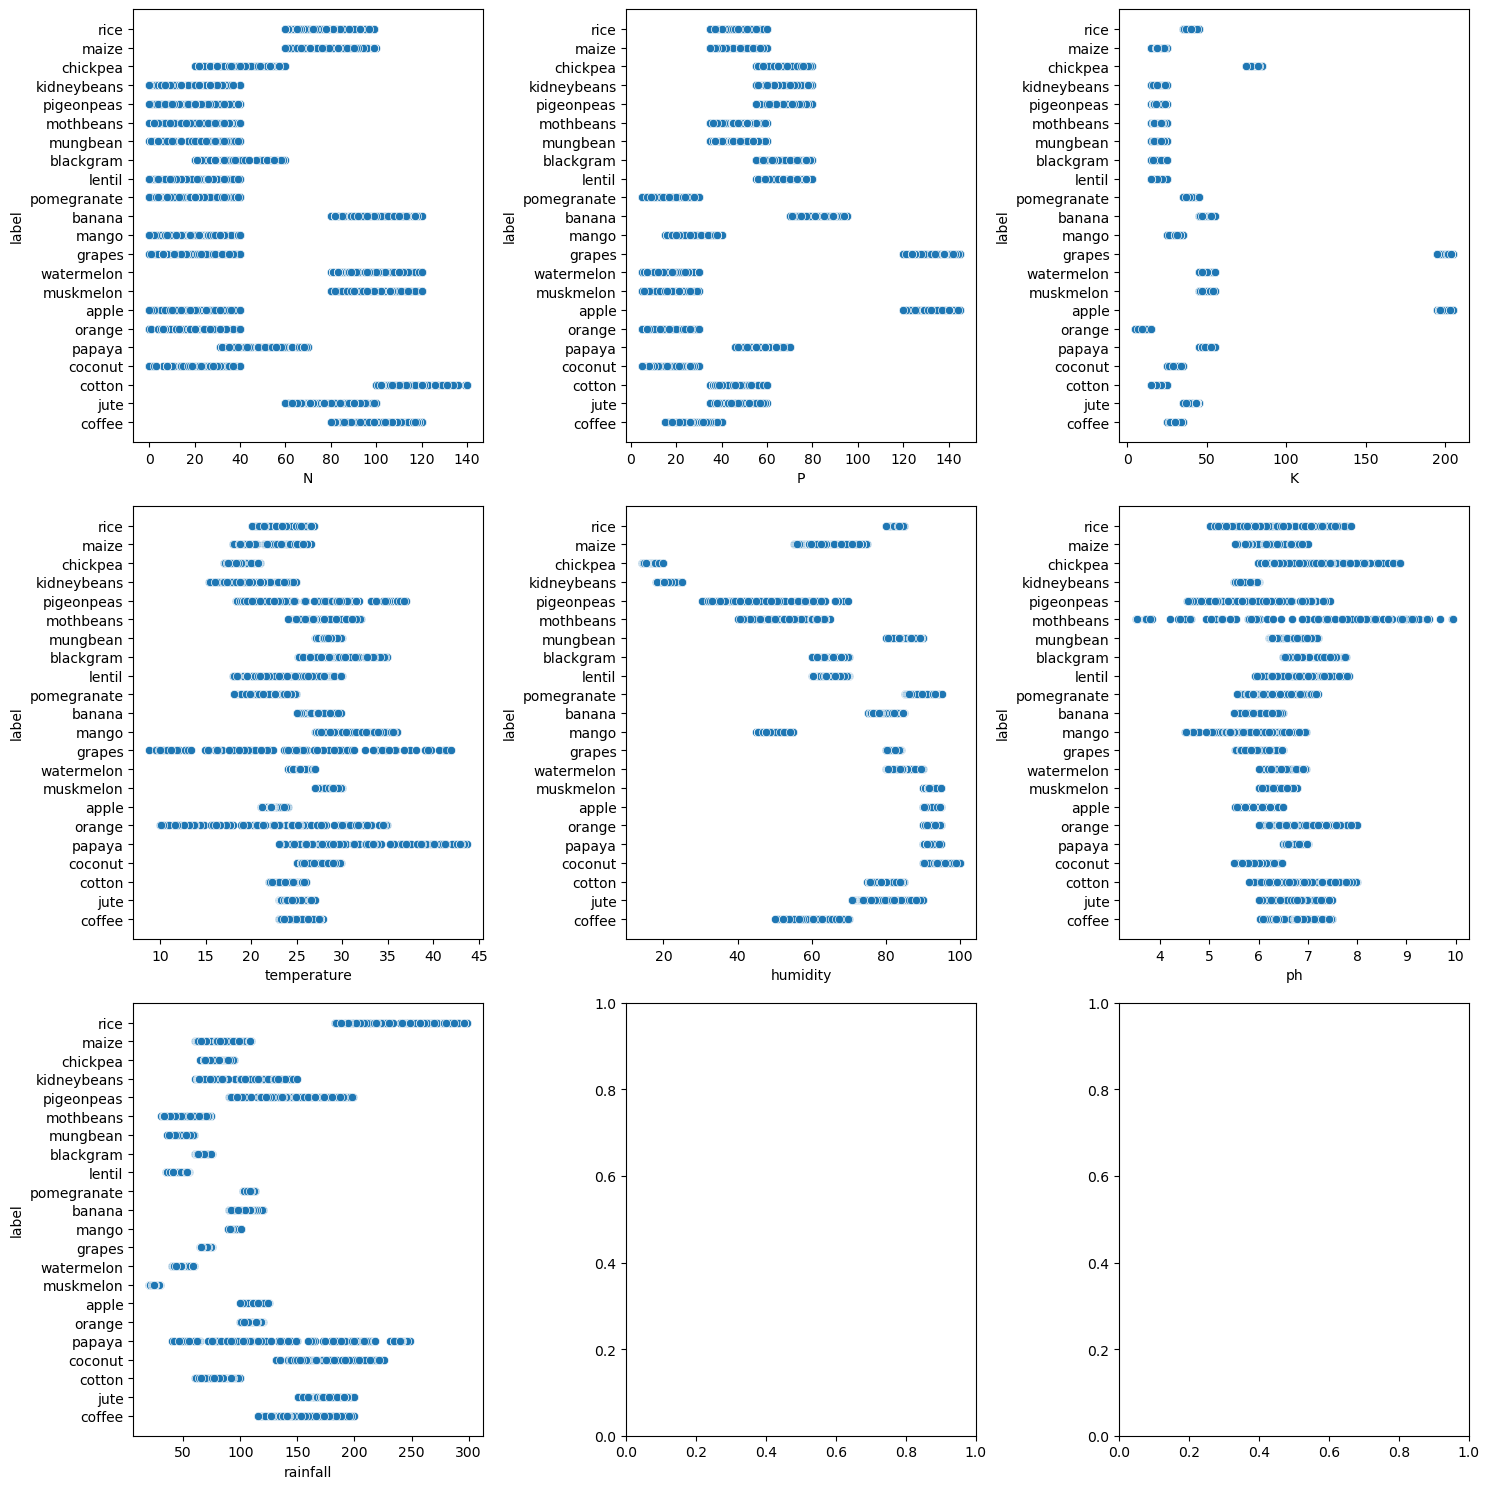

In [223]:
#Plotting scatter plot

fig, ax = plt.subplots(3,3, figsize=(15,15))
for i, subplot in zip(features, ax.flatten()):
    sns.scatterplot(x=i, y='label',data=crop, ax=subplot)
plt.tight_layout()
plt.show()

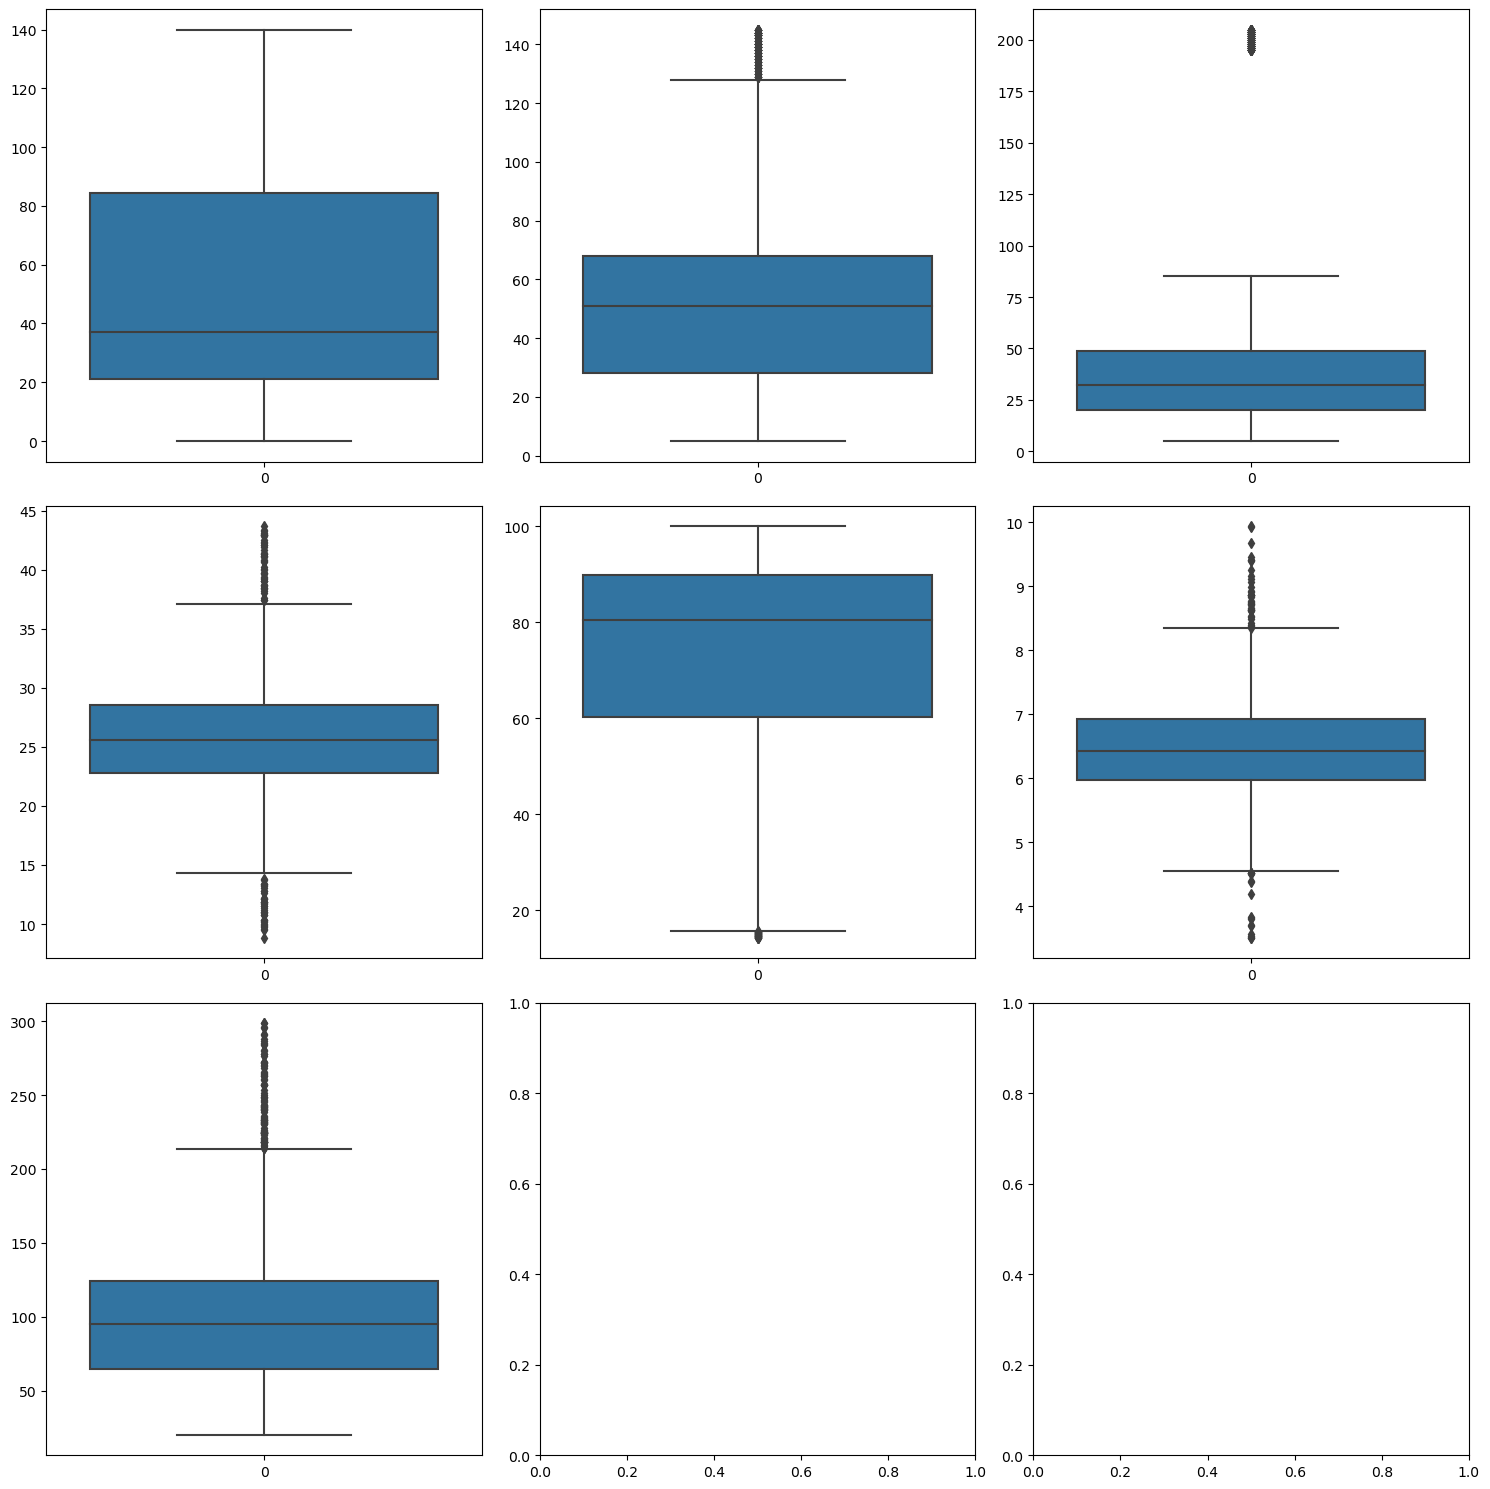

In [224]:
#Finding outliers - boxplot

fig, ax = plt.subplots(3, 3, figsize=(15,15))
for i,subplot in zip(features, ax.flatten()):
    sns.boxplot(crop[i], ax=subplot)
plt.tight_layout()
plt.show()

In [225]:
#correlation of featues
num_cols=crop.select_dtypes(include=np.number)
corr = num_cols.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


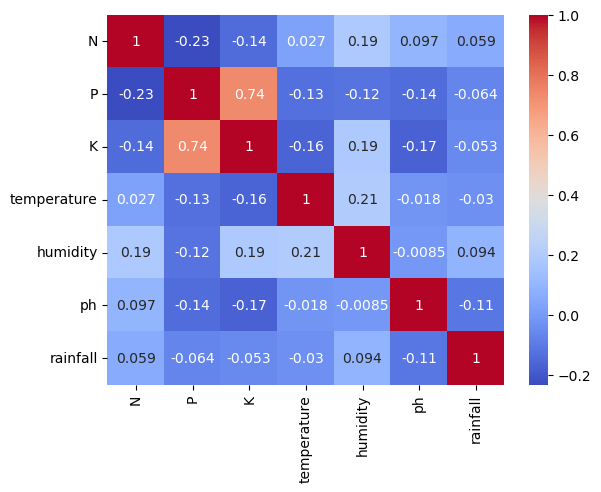

In [226]:
#visualizing with heat maps
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

### Encoding

In [227]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [228]:
crop_dict={'rice':1, 
           'maize':2, 
           'chickpea':3, 
           'kidneybeans':4, 
           'pigeonpeas':5,
           'mothbeans':6, 
           'mungbean':7, 
           'blackgram':8, 
           'lentil':9, 
           'pomegranate':10,
           'banana':11, 
           'mango':12, 
           'grapes':13, 
           'watermelon':14, 
           'muskmelon':15, 
           'apple':16,
           'orange':17, 
           'papaya':18, 
           'coconut':19, 
           'cotton':20, 
           'jute':21, 
           'coffee':22}

In [229]:
crop['crop_no'] = crop['label'].map(crop_dict)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


In [230]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,22
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,22


In [231]:
crop.drop('label', axis=1, inplace=True)
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,crop_no
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,22
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,22


## Box Plot for comparing a particular Feature like N,K,P,etc across different crop types

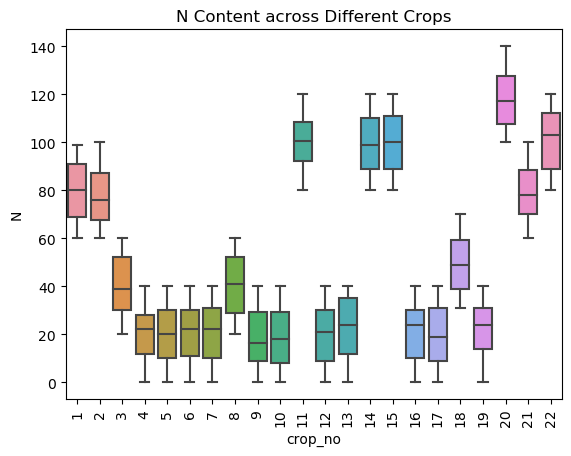

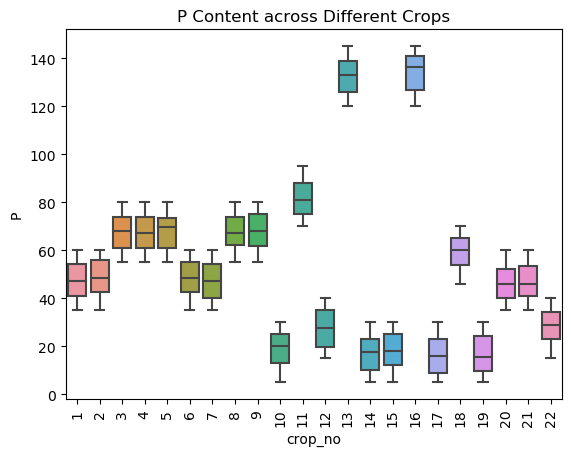

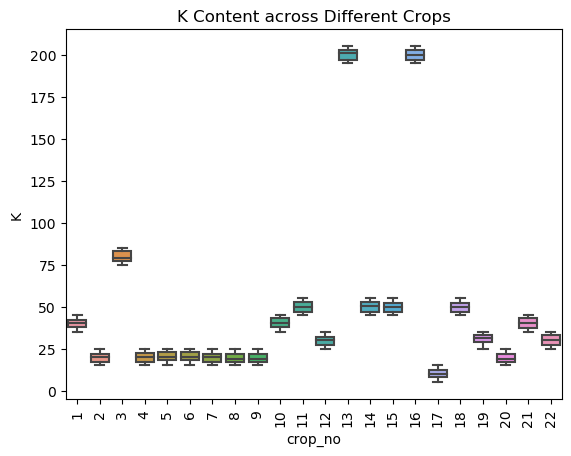

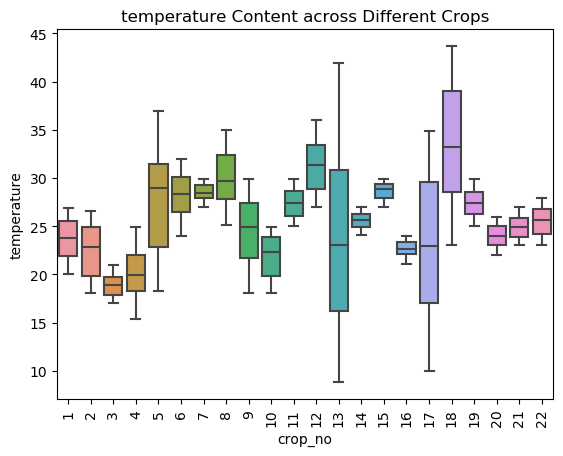

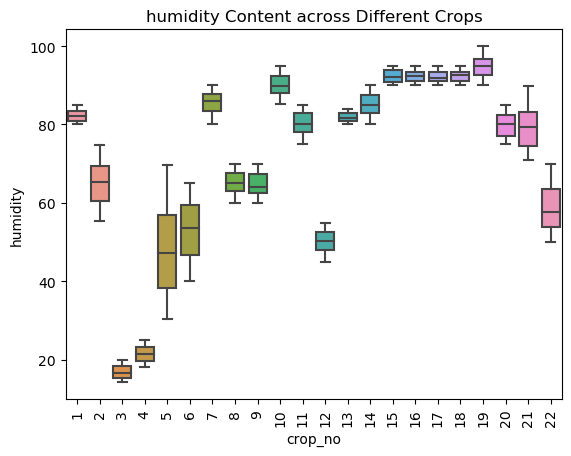

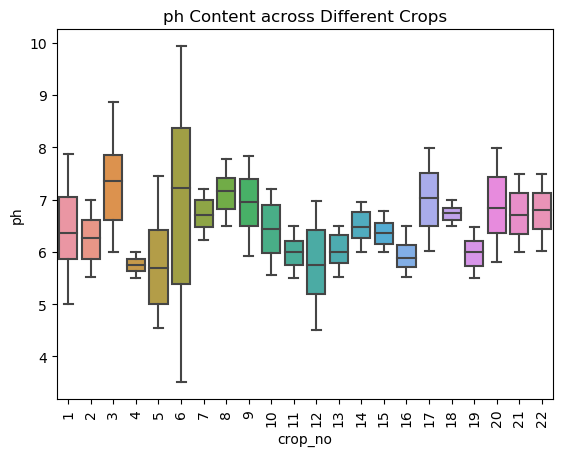

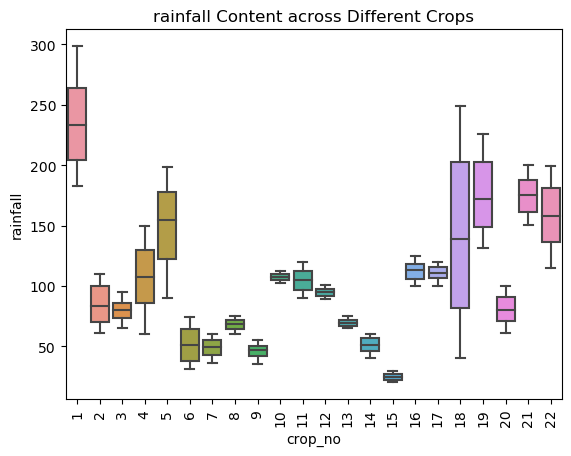

In [299]:

# Box Plots for a variable against crop types
feat=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for i in feat:
    sns.boxplot(x='crop_no', y=i, data=crop)
    plt.xticks(rotation=90)
    plt.title('{0} Content across Different Crops'.format(i))
    plt.show()

In [233]:
# Train Test Split
X = crop.drop('crop_no', axis=1)
y=crop['crop_no']

In [234]:
X.shape

(2200, 7)

In [235]:
y.shape

(2200,)

In [236]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

In [237]:
X_train.shape #As 80% data is for training

(1760, 7)

In [238]:
X_test.shape #As 20% data is for testing

(440, 7)

In [239]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [240]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## Random Forest Classifier

In [248]:
rf = RandomForestClassifier(n_estimators=300, random_state=45)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=45, verbose=0,
                       warm_start=False)

## Improved Accuracy

In [249]:
y_pred1=rf.predict(X_test_scaled)
acc1 = accuracy_score(y_test, y_pred1)
print("Accuracy Score: ",acc1)

Accuracy Score:  0.9954545454545455


In [250]:
#Prediction
import numpy as np
def crop_rec(N, P, K, temp, hum, ph, rain):
    features = np.array([[N, P , K, temp, hum, ph, rain]])
    transformed_features = scaler.transform(features)
    prediction = dtc.predict(transformed_features).reshape(1,-1)
    crop_dict={1:'rice',
            2: 'maize',
            3: 'chickpea',
            4: 'kidneybeans',
            5: 'pigeonpeas',
            6: 'mothbeans' , 
            7: 'mungbean', 
            8: 'blackgram',
            9: 'lentil' ,
            10: 'pomegranate' ,
            11: 'banana' , 
            12: 'mango' ,
            13: 'grapes' ,
            14: 'watermelon' ,
            15: 'muskmelon' ,
            16: 'apple' ,
            17: 'orange' ,
            18: 'papaya' ,
            19: 'coconut' ,
            20: 'cotton' ,
            21: 'jute' ,
            22:'coffee' }
    crop = [crop_dict[i] for i in prediction[0]]
    return (f"{crop} is a best crop to grow in the farm")

In [251]:
#Predicting with the values
N = 90
P = 45
K = 43
temp = 20.0
hum = 82.0
ph = 6.1
rain = 202.2
newdata=crop_rec(35, 64, 78, 17.92, 14.27, 7.49, 85.37)
newdata

"['chickpea'] is a best crop to grow in the farm"

## Fertilizer Recommendation

In [252]:
## Fertlizer Recommendation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [253]:
# load the dataset
fertilizer = pd.read_csv("dataset/Fertilizer Prediction.csv")
fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


DAP - Diammoniun Phosphate; 14-35-14 - NPK; 28-28 - NP; and so

In [254]:
# check the shape of the dataset
fertilizer.shape

(99, 9)

In [255]:
# check the basic info of the dataset
fertilizer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
Temparature        99 non-null int64
Humidity           99 non-null int64
Moisture           99 non-null int64
Soil Type          99 non-null object
Crop Type          99 non-null object
Nitrogen           99 non-null int64
Potassium          99 non-null int64
Phosphorous        99 non-null int64
Fertilizer Name    99 non-null object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [256]:
# check the missing values in the dataset
fertilizer.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [257]:
# check the duplicated values in the dataset
fertilizer.duplicated().sum()

0

In [258]:
# check the basic statistics of the dataset
fertilizer.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [259]:
# Only select the numerical columns
fertilizer_numeric = fertilizer.select_dtypes(include=[np.number])
corr = fertilizer_numeric.corr()
corr

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
Temparature,1.000000,0.973164,0.091222,-0.033771,-0.023424,0.207545
Humidity,0.973164,1.000000,0.091342,-0.060646,-0.003833,0.204044
Moisture,0.091222,0.091342,1.000000,-0.095945,0.027727,0.009276
Nitrogen,-0.033771,-0.060646,-0.095945,1.000000,-0.500087,-0.686971
Potassium,-0.023424,-0.003833,0.027727,-0.500087,1.000000,0.089192
Phosphorous,0.207545,0.204044,0.009276,-0.686971,0.089192,1.000000


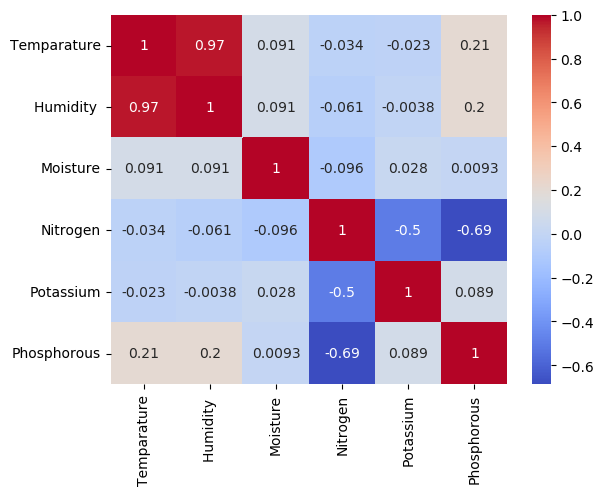

In [260]:
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')
plt.show()

In [261]:
fertilizer['Fertilizer Name'].value_counts()

Urea        22
DAP         18
28-28       17
20-20       14
14-35-14    14
17-17-17     7
10-26-26     7
Name: Fertilizer Name, dtype: int64

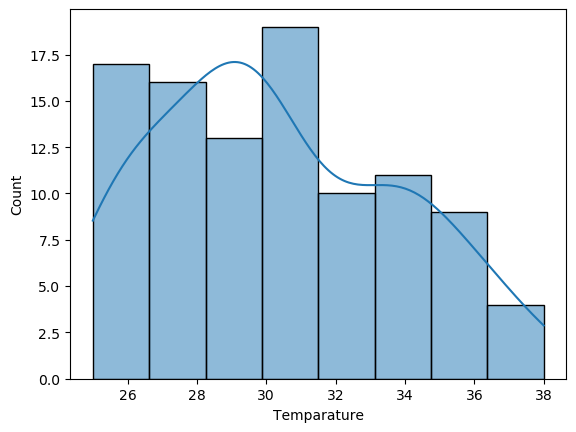

In [262]:
# check the distribution of the temperature column
sns.histplot(fertilizer['Temparature'], kde=True)
plt.show()

In [263]:
# Only select the numerical columns 
features = fertilizer.select_dtypes(include=[np.number]).columns.tolist()
print(features)

['Temparature', 'Humidity ', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']


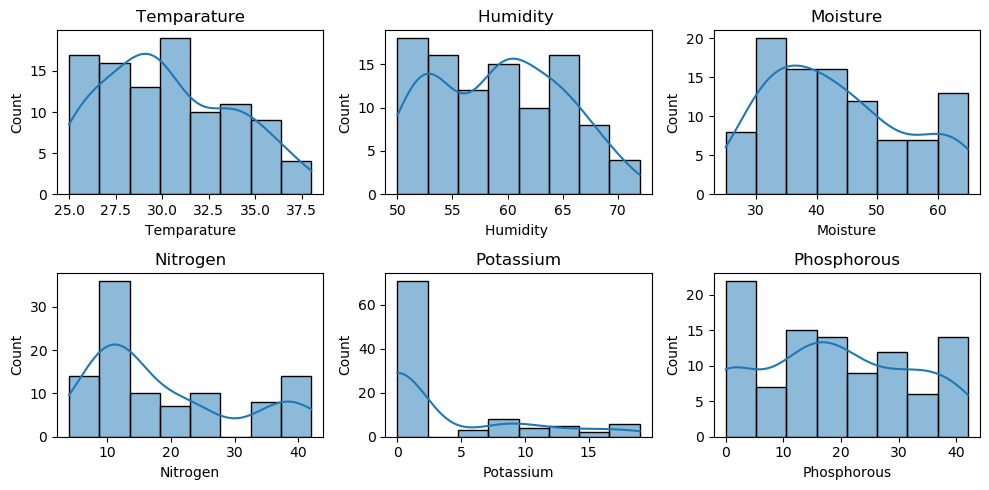

In [264]:
# visualize the distribution of each feature
fig, ax = plt.subplots(2, 3, figsize=(10, 5))
for i, subplot in zip(features, ax.flatten()):
    sns.histplot(fertilizer[i], ax=subplot, kde=True)
    subplot.set_title(i)
plt.tight_layout()
plt.show()

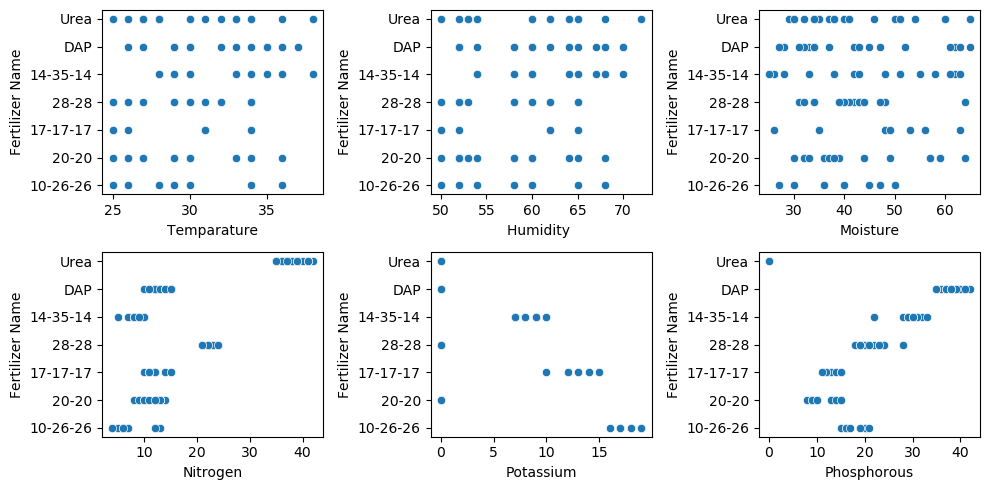

In [265]:
# plot scatter plot of each feature against the target
fig, ax = plt.subplots(2, 3, figsize=(10, 5))
for i, subplot in zip(features, ax.flatten()):
    sns.scatterplot(x=i, y='Fertilizer Name', data=fertilizer, ax=subplot)
plt.tight_layout()
plt.show()

In [266]:
fert_dict = {
'Urea':1,
'DAP':2,
'14-35-14':3,
'28-28':4,
'17-17-17':5,
'20-20':6,
'10-26-26':7,
}

In [267]:
fertilizer['fert_no'] = fertilizer['Fertilizer Name'].map(fert_dict)

In [268]:
fertilizer['fert_no'].value_counts()

1    22
2    18
4    17
6    14
3    14
7     7
5     7
Name: fert_no, dtype: int64

In [269]:
# drop the target column with name and keep the target column with numbers
fertilizer.drop('Fertilizer Name',axis=1,inplace=True)
fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,fert_no
0,26,52,38,Sandy,Maize,37,0,0,1
1,29,52,45,Loamy,Sugarcane,12,0,36,2
2,34,65,62,Black,Cotton,7,9,30,3
3,32,62,34,Red,Tobacco,22,0,20,4
4,28,54,46,Clayey,Paddy,35,0,0,1


In [270]:
# Select the object columns
fertilizer.select_dtypes(include=['object']).columns

Index(['Soil Type', 'Crop Type'], dtype='object')

In [271]:
# convert the categorical columns to numerical columns using labelencoder
lb = LabelEncoder()
fertilizer["Soil Type"]=lb.fit_transform(fertilizer['Soil Type'])
fertilizer['Crop Type']=lb.fit_transform(fertilizer['Crop Type'])

In [272]:
fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,fert_no
0,26,52,38,4,3,37,0,0,1
1,29,52,45,2,8,12,0,36,2
2,34,65,62,0,1,7,9,30,3
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,1


In [273]:
# split the dataset into features and target
x = fertilizer.drop('fert_no',axis=1)
y = fertilizer['fert_no']
# print the shape of features and target
print(f"The shape of features is: {x.shape}")
print(f"The shape of target is: {y.shape}")

The shape of features is: (99, 8)
The shape of target is: (99,)


In [274]:
# split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=46)

# print the shape of training and testing sets
print(f"The shape of x_train is: {x_train.shape}")
print(f"The shape of x_test is: {x_test.shape}")
print(f"The shape of y_train is: {y_train.shape}")
print(f"The shape of y_test is: {y_test.shape}")

The shape of x_train is: (79, 8)
The shape of x_test is: (20, 8)
The shape of y_train is: (79,)
The shape of y_test is: (20,)


## Scaling

In [275]:
# Scale the features using StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Traning Model

In [276]:
# insialize the DecisionTreeClassifier
model = DecisionTreeClassifier()

In [277]:
# train the model
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [278]:
# evaluate the model on the test set and print the accuracy
accuracy = model.score(x_test, y_test)
print(f"The accuracy of the model is: {accuracy*100:.2f}%")

The accuracy of the model is: 100.00%


In [279]:
# evaluate the model on the training set and print the accuracy
accuracy = model.score(x_train, y_train)
print(f"The accuracy of the model on the training set is: {accuracy*100:.2f}%")

The accuracy of the model on the training set is: 100.00%


## Predictive System

In [280]:
def recommend_fertilizer(Temparature, Humidity, Moisture, Soil_Type, Crop_Type, Nitrogen, Potassium, Phosphorous):
    features = np.array([[Temparature, Humidity, Moisture, Soil_Type, Crop_Type, Nitrogen, Potassium, Phosphorous]])
    transformed_features = sc.transform(features)
    prediction = model.predict(transformed_features).reshape(1,-1)
    fert_dict = {1: 'Urea', 2: 'DAP', 3: '14-35-14', 4: '28-28', 5: '17-17-17', 6: '20-20', 7: '10-26-26'}
    fertilizer = [fert_dict[i] for i in prediction[0]]
    
    return f"{fertilizer} is a best fertilizer for the given conditions" 

In [281]:
# Given input values
Temparature = 26
Humidity = 0.5
Moisture = 0.6
Soil_Type = 2
Crop_Type = 3
Nitrogen = 10
Potassium = 15
Phosphorous = 6
    
# Use the recommendation function to get a prediction
recommend_fertilizer(Temparature, Humidity, Moisture, Soil_Type, Crop_Type, Nitrogen, Potassium, Phosphorous)

"['17-17-17'] is a best fertilizer for the given conditions"

## GUI Interface to implement Crop and Fertilizer Recommendation System

In [282]:

#GUI interface

import numpy as np
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# Generate Dummy Fertilizer Dataset
np.random.seed(42)
data = pd.DataFrame({
    'Temperature': np.random.uniform(10, 40, 100),
    'Humidity': np.random.uniform(20, 90, 100),
    'Moisture': np.random.uniform(10, 50, 100),
    'Soil_Type': np.random.randint(1, 5, 100),  # 1: Sandy, 2: Loamy, 3: Clayey, 4: Silty
    'Crop_Type': np.random.randint(1, 8, 100),  # 1 to 7 (matching crops)
    'Nitrogen': np.random.randint(0, 100, 100),
    'Potassium': np.random.randint(0, 100, 100),
    'Phosphorous': np.random.randint(0, 100, 100),
    'Fertilizer': np.random.randint(1, 8, 100)  # 7 fertilizer types
})

# Features and Labels
X = data.drop(columns=['Fertilizer'])
y = data['Fertilizer']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize Features
fertilizer_scaler = StandardScaler()
X_train_scaled = fertilizer_scaler.fit_transform(X_train)
X_test_scaled = fertilizer_scaler.transform(X_test)

# Train Decision Tree Classifier
fertilizer_model = DecisionTreeClassifier()
fertilizer_model.fit(X_train_scaled, y_train)

# Save the Model and Scaler
joblib.dump(fertilizer_scaler, "fertilizer_scaler.pkl")
joblib.dump(fertilizer_model, "fertilizer_model.pkl")

print("✅ Fertilizer Model and Scaler saved successfully!")


✅ Fertilizer Model and Scaler saved successfully!


In [298]:
#Creating GUI inteface 

import numpy as np
import tkinter as tk
import threading
import joblib
from tkinter import ttk

# Load Models and Scalers
scaler = joblib.load("scaler.pkl")
dtc = joblib.load("dtc.pkl")
fertilizer_scaler = joblib.load("fertilizer_scaler.pkl")
fertilizer_model = joblib.load("fertilizer_model.pkl")

# Create Tkinter Window
root = tk.Tk()
root.title("Crop & Fertilizer Recommendation System")
root.geometry('650x650')
root.configure(bg="aqua")

# Apply Styling
style = ttk.Style()
style.configure("TButton", font=("Arial", 12), padding=6, background="blue", foreground="black")
style.configure("TLabel", font=("Arial", 12), background="#EAF6F6")
style.configure("TEntry", font=("Arial", 12), padding=5)

# Create a Frame
frame = tk.Frame(root, bg="white", padx=20, pady=20, relief=tk.RAISED, bd=2)
frame.place(relx=0.5, rely=0.5, anchor=tk.CENTER)

# Title Label
title = tk.Label(frame, text=" Crop & Fertilizer Recommendation ", font=("Arial", 16, "bold"), fg="#2C786C", bg="white")
title.grid(row=0, column=0, columnspan=2, pady=10)

# Input Fields
entries = {}
fields = ["N", "P", "K", "Temperature", "Humidity", "Ph", "Rainfall", "Moisture", "Soil Type", "Crop Type"]

for i, field in enumerate(fields):
    ttk.Label(frame, text=f"{field}:", font=("Arial", 12)).grid(row=i+1, column=0, padx=10, pady=5, sticky="w")
    entries[field] = ttk.Entry(frame, width=20)
    entries[field].grid(row=i+1, column=1, padx=10, pady=5)

# Dictionaries for Crops & Fertilizers
crop_dict = {1: 'Rice', 2: 'Maize', 3: 'Chickpea', 4: 'Kidney Beans',
             5: 'Pigeon Peas', 6: 'Moth Beans', 7: 'Mungbean', 8: 'Blackgram',
             9: 'Lentil', 10: 'Pomegranate', 11: 'Banana', 12: 'Mango',
             13: 'Grapes', 14: 'Watermelon', 15: 'Muskmelon', 16: 'Apple',
             17: 'Orange', 18: 'Papaya', 19: 'Coconut', 20: 'Cotton',
             21: 'Jute', 22: 'Coffee'}

fert_dict = {1: 'Urea', 2: 'DAP', 3: '14-35-14', 4: '28-28', 5: '17-17-17', 6: '20-20', 7: '10-26-26'}

# Crop Recommendation Function
def crop_rec():
    try:
        n, p, k = int(entries["N"].get()), int(entries["P"].get()), int(entries["K"].get())
        t, h, ph, r = float(entries["Temperature"].get()), float(entries["Humidity"].get()), float(entries["Ph"].get()), float(entries["Rainfall"].get())

        features = np.array([[n, p, k, t, h, ph, r]])
        transformed_features = scaler.transform(features)
        prediction = dtc.predict(transformed_features).reshape(1, -1)
        crop = crop_dict.get(prediction[0][0], "Unknown Crop")

        result_label.config(text=f" Recommended Crop: {crop}", fg="green")
    except ValueError:
        result_label.config(text="⚠ Invalid Input! Enter numeric values.", fg="red")

# Fertilizer Recommendation Function
def recommend_fertilizer():
    try:
        t, h, m = float(entries["Temperature"].get()), float(entries["Humidity"].get()), float(entries["Moisture"].get())
        st, ct = int(entries["Soil Type"].get()), int(entries["Crop Type"].get())
        n, p, k = int(entries["N"].get()), int(entries["P"].get()), int(entries["K"].get())

        features = np.array([[t, h, m, st, ct, n, k, p]])
        transformed_features = fertilizer_scaler.transform(features)
        prediction = fertilizer_model.predict(transformed_features).reshape(1, -1)
        #fertilizer = fert_dict.get(prediction[0][0], "Unknown Fertilizer")

        fertilizer = [fert_dict[i] for i in prediction[0]]
        #return f"{fertilizer} is a best fertilizer for the given conditions" 
        fert_result_label.config(text=f" Recommended Fertilizer: {fertilizer}", fg="blue")
    except ValueError:
        fert_result_label.config(text="⚠ Invalid Input! Enter numeric values.", fg="red")

# Run Prediction in Background
def run_predictions():
    threading.Thread(target=crop_rec).start()
    threading.Thread(target=recommend_fertilizer).start()

# Button
recommend_button = ttk.Button(frame, text="Recommend", command=run_predictions)
recommend_button.grid(row=len(fields)+1, column=0, columnspan=2, pady=15)

# Result Labels
result_label = tk.Label(frame, text="", font=("Arial", 12, "bold"), bg="light green")
result_label.grid(row=len(fields)+2, column=0, columnspan=2, pady=5)

fert_result_label = tk.Label(frame, text="", font=("Arial", 12, "bold"), bg="light pink")
fert_result_label.grid(row=len(fields)+3, column=0, columnspan=2, pady=5)

root.mainloop()
